In [1]:
import sys
import numpy as np
import math
sys.path.append("../build/python")  # set to correct path for module
import varttpy

In [2]:
## Hubbard model
L=10

## Kinetic energy TB Hamiltonian
K=np.zeros((2*L,2*L))
for i in range(L-1):
    K[i,i+1]=K[i+1,i]=-1                 ## spin up
    K[L+i,L+i+1]=K[L+i+1,L+i]=-1         ## spin down

## U ni nj for Hubbard
U=2.0
Umat=np.zeros((2*L,2*L))
for i in range(L):
    Umat[i,i+L]=U
    K[i,i]=K[L+i,L+i]=-U/2

Vijkl={}
    
model = varttpy.Fermionic(K,Umat,Vijkl)

In [10]:
sol=varttpy.DMRG(model.Ham())
sol.bond_dim=256
sol.nIter_diag=32
Npart=model.NParticle();
print("sweep energy Npart")
eners=[]
for i in range(7):
    if i > 4: sol.nIter_diag=64
    sol.iterate()
    print(i+1, sol.energy, sol.Expectation(Npart))
    eners += [sol.energy]

variance_rel=sol.H2(4*sol.bond_dim)/sol.energy**2-1
print("H^2/E^2-1=", variance_rel)

sweep energy Npart
1 -17.868055683559977 9.999701724402863
2 -17.908727411726577 10.000000000372449
3 -17.908735813559176 9.99999999999849
4 -17.908735995673403 9.999999999998884
5 -17.908736019733073 9.999999999998868
6 -17.908736024019422 9.999999999998842
7 -17.90873602597121 9.999999999998906
H^2/E^2-1= 1.877398236871386e-10


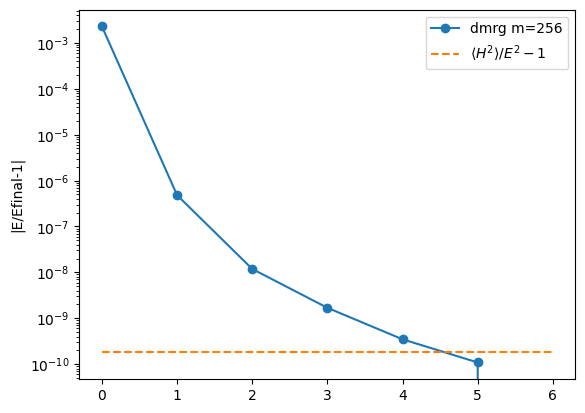

In [12]:
import matplotlib.pyplot as plt
plt.yscale('log')
eRef=np.min(eners)
plt.ylabel("|E/Efinal-1|")
plt.plot([abs(x/eRef-1) for x in eners], '-o', label=f'dmrg m={sol.bond_dim}')
plt.plot([variance_rel for x in eners], '--', label="$\\langle H^2 \\rangle /E^2-1$")
plt.legend()

In [7]:
print("Npart=",sol.Expectation(Npart))
print("H2/E^2-1")
ener=sol.Expectation(model.Ham())
m=sol.bond_dim
for mi in [m//2, m, 2*m, 3*m, 4*m]:
    print(sol.H2(mi)/ener**2-1, sol.sigma(mi) )

Npart= 9.999999999998838
H2/E^2-1
3.0094902763622144e-05 1.391371637649161e-06
2.587453175939558e-06 4.3939600435325955e-06
1.725719434020334e-08 7.324776291427413e-05
2.852054148405614e-10 0.00021074822155366153
1.7655854556153372e-10 0.00023791870759803656
